In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
from pathlib import Path
# Dependencies
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csv_path = Path("Resource/123.csv")
df = pd.read_csv(csv_path)
df.head()

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,37146,NaN,NaN,NaN,0
1,1961-04,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38476,NaN,NaN,NaN,0
2,1961-07,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38871,NaN,NaN,NaN,0
3,1961-10,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38446,NaN,NaN,NaN,0
4,1962-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,39497,NaN,NaN,NaN,0


In [4]:
# # Assume df is your DataFrame and 'date' is your column with dates
# df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')
# df

In [5]:
# df.set_index('REF_DATE', inplace=True)

In [6]:
# group_df = df.groupby(['REF_DATE', 'Estimates', "VALUE"])

# group_df.head()

In [7]:
# Assume df is your DataFrame and 'date' is your column with dates
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')

df["REF_YEAR"] = df["REF_DATE"].dt.year

clean_df = df.groupby(['REF_YEAR', 'Estimates']).sum()
# Set 'date' as index if it's not yet
#df.set_index('REF_DATE', inplace=True)

# Resample to yearly data, taking the mean of each year
# df_yearly = df.resample('Y').sum()


# df_yearly

C:\Users\Penny\AppData\Local\Temp\ipykernel_20300\3214271266.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df = df.groupby(['REF_YEAR', 'Estimates']).sum()


In [8]:
clean_df.reset_index(inplace=True)

In [9]:
clean_df

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,59899,0.0,0.0,0.0,0
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
940,2023,Insurance and financial services [C23],81,6,124753,0.0,0.0,0.0,0
941,2023,Miscellaneous goods and services [C24],81,6,64466,0.0,0.0,0.0,0
942,2023,Net expenditure abroad [C25],81,6,1504,0.0,0.0,0.0,0
943,2023,Recreation and culture [C19],81,6,104858,0.0,0.0,0.0,0


In [10]:
#Delete extraneous coolumn
clean_df[["REF_YEAR","Estimates","VALUE"]].head(20)

,REF_YEAR,Estimates,VALUE
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",59899
1,1961,Clothing and footwear [C13],31637
2,1961,Communications [C18],4147
3,1961,Education [C21],7312
4,1961,Food and non-alcoholic beverages [C11],152939
5,1961,"Food, beverage and accommodation services [C22]",84105
6,1961,"Furnishings, household equipment and other goo...",33064
7,1961,Health [C16],29625
8,1961,Household final consumption expenditure [C],749193
9,1961,"Housing, water, electricity, gas and other fue...",247124


In [11]:
#rename the columns
rename_clean_df =clean_df.rename(columns={"REF_YEAR":"YEAR" , "Estimates": "Expenditures_(Millions_Dallars)"})
rename_clean_df

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,59899,0.0,0.0,0.0,0
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
940,2023,Insurance and financial services [C23],81,6,124753,0.0,0.0,0.0,0
941,2023,Miscellaneous goods and services [C24],81,6,64466,0.0,0.0,0.0,0
942,2023,Net expenditure abroad [C25],81,6,1504,0.0,0.0,0.0,0
943,2023,Recreation and culture [C19],81,6,104858,0.0,0.0,0.0,0


In [12]:
#Delete extraneous coolumn
rename_clean_df[["YEAR","Expenditures_(Millions_Dallars)","VALUE"]].tail(20)

,YEAR,Expenditures_(Millions_Dallars),VALUE
925,2022,Insurance and financial services [C23],509040
926,2022,Miscellaneous goods and services [C24],255727
927,2022,Net expenditure abroad [C25],492
928,2022,Recreation and culture [C19],407300
929,2022,Transport [C17],651906
930,2023,"Alcoholic beverages, tobacco and cannabis [C12]",42140
931,2023,Clothing and footwear [C13],59496
932,2023,Communications [C18],41002
933,2023,Education [C21],20224
934,2023,Food and non-alcoholic beverages [C11],106825


In [13]:
# Expense items
expense_items=rename_clean_df["Expenditures_(Millions_Dallars)"].unique()
expense_items

array(['Alcoholic beverages,  tobacco and cannabis [C12]',
       'Clothing and footwear [C13]', 'Communications [C18]',
       'Education [C21]', 'Food and non-alcoholic beverages [C11]',
       'Food, beverage and accommodation services [C22]',
       'Furnishings, household equipment and other goods and services related to the dwelling and property [C15]',
       'Health [C16]', 'Household final consumption expenditure [C]',
       'Housing, water, electricity, gas and other fuels [C14]',
       'Insurance and financial services [C23]',
       'Miscellaneous goods and services [C24]',
       'Net expenditure abroad [C25]', 'Recreation and culture [C19]',
       'Transport [C17]'], dtype=object)

In [14]:
expense_items=rename_clean_df["Expenditures_(Millions_Dallars)"].nunique()
expense_items

15

In [15]:
#Alcoholic beverages,  tobacco and cannabis [C12]
Expenses_C12  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Alcoholic beverages,  tobacco and cannabis [C12]", ]
Expenses_C12[["YEAR","Expenditures_(Millions_Dallars)","VALUE"]]

,YEAR,Expenditures_(Millions_Dallars),VALUE
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",59899
15,1962,"Alcoholic beverages, tobacco and cannabis [C12]",63418
30,1963,"Alcoholic beverages, tobacco and cannabis [C12]",66918
45,1964,"Alcoholic beverages, tobacco and cannabis [C12]",69573
60,1965,"Alcoholic beverages, tobacco and cannabis [C12]",76114
...,...,...,...
870,2019,"Alcoholic beverages, tobacco and cannabis [C12]",162677
885,2020,"Alcoholic beverages, tobacco and cannabis [C12]",171243
900,2021,"Alcoholic beverages, tobacco and cannabis [C12]",173929
915,2022,"Alcoholic beverages, tobacco and cannabis [C12]",171608


In [16]:
# Plot graph :Alcoholic beverages,  tobacco and cannabis [C12]
Year_Expenses_C12 = Expenses_C12[["YEAR","VALUE"]]
Year_Expenses_C12=Year_Expenses_C12.set_index("YEAR")
Year_Expenses_C12= Year_Expenses_C12.rename(columns={"VALUE":"Alcoholic beverages_Value"})
Year_Expenses_C12


,Alcoholic beverages_Value
YEAR,
1961,59899
1962,63418
1963,66918
1964,69573
1965,76114
...,...
2019,162677
2020,171243
2021,173929


<IPython.core.display.Javascript object>


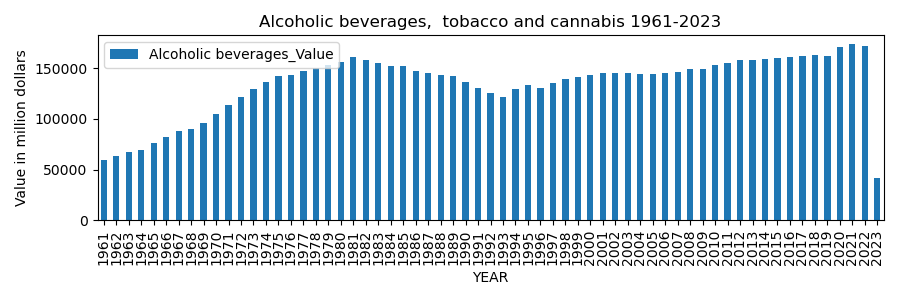

In [17]:
# Plot graph :Alcoholic beverages,  tobacco and cannabis [C12]

Year_Expenses_C12.plot(kind="bar", figsize=(9,3))

# Set a title for the chart
plt.title("Alcoholic beverages,  tobacco and cannabis 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C12.png")
plt.show()
plt.tight_layout()


In [18]:
#Communications [C18]
Expenses_C18  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Communications [C18]", ]
Expenses_C18                             
                                 

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
17,1962,Communications [C18],324,24,4418,0.0,0.0,0.0,0
32,1963,Communications [C18],324,24,4711,0.0,0.0,0.0,0
47,1964,Communications [C18],324,24,5057,0.0,0.0,0.0,0
62,1965,Communications [C18],324,24,5324,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
872,2019,Communications [C18],324,24,133951,0.0,0.0,0.0,0
887,2020,Communications [C18],324,24,138396,0.0,0.0,0.0,0
902,2021,Communications [C18],324,24,149066,0.0,0.0,0.0,0
917,2022,Communications [C18],324,24,156765,0.0,0.0,0.0,0


In [19]:
Year_Expenses_C18 = Expenses_C18[["YEAR","VALUE"]]
Year_Expenses_C18=Year_Expenses_C18.set_index("YEAR")
Year_Expenses_C18= Year_Expenses_C18.rename(columns={"VALUE":"Communication_Value"})
Year_Expenses_C18


,Communication_Value
YEAR,
1961,4147
1962,4418
1963,4711
1964,5057
1965,5324
...,...
2019,133951
2020,138396
2021,149066


<IPython.core.display.Javascript object>


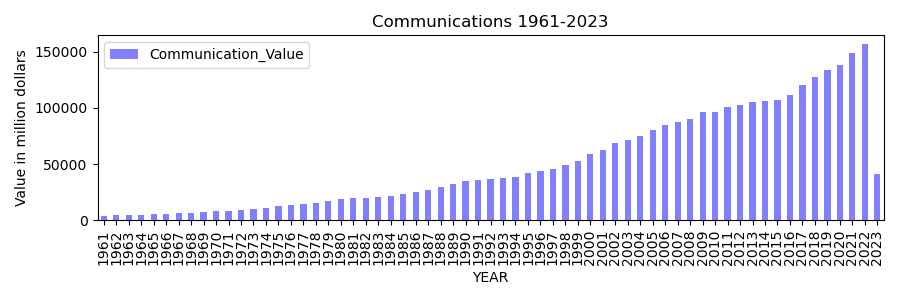

In [20]:
#Plot Communications 

Year_Expenses_C18.plot(kind="bar", figsize=(9,3),color="b",alpha=0.5)

# Set a title for the chart
plt.title("Communications 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C18.png")
plt.show()
plt.tight_layout()


In [21]:
#Clothing and footwear [C13]
Expenses_C13  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Clothing and footwear [C13]", ]
Expenses_C13

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
16,1962,Clothing and footwear [C13],324,24,33765,0.0,0.0,0.0,0
31,1963,Clothing and footwear [C13],324,24,34746,0.0,0.0,0.0,0
46,1964,Clothing and footwear [C13],324,24,35842,0.0,0.0,0.0,0
61,1965,Clothing and footwear [C13],324,24,37640,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
871,2019,Clothing and footwear [C13],324,24,201448,0.0,0.0,0.0,0
886,2020,Clothing and footwear [C13],324,24,163667,0.0,0.0,0.0,0
901,2021,Clothing and footwear [C13],324,24,193730,0.0,0.0,0.0,0
916,2022,Clothing and footwear [C13],324,24,224931,0.0,0.0,0.0,0


In [22]:
Year_Expenses_C13 = Expenses_C13[["YEAR","VALUE"]]
Year_Expenses_C13=Year_Expenses_C13.set_index("YEAR")
Year_Expenses_C13= Year_Expenses_C13.rename(columns={"VALUE":"Clothing and footwear_Value"})
Year_Expenses_C13

,Clothing and footwear_Value
YEAR,
1961,31637
1962,33765
1963,34746
1964,35842
1965,37640
...,...
2019,201448
2020,163667
2021,193730


<IPython.core.display.Javascript object>


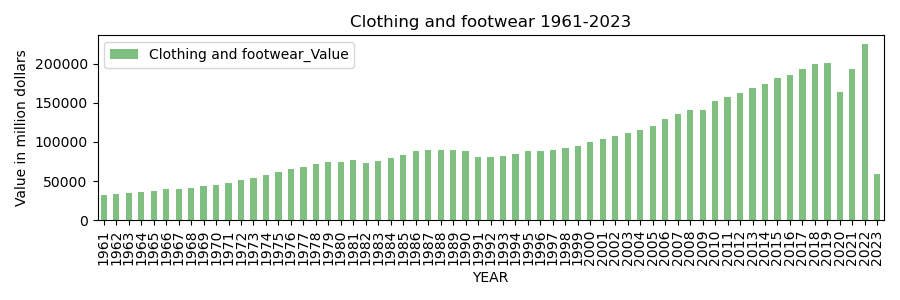

In [73]:
#Plot Clothing and footwear [C13]


Year_Expenses_C13.plot(kind="bar", figsize=(9,3),color="green",alpha=0.5)

# Set a title for the chart
plt.title("Clothing and footwear 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C13.png")
plt.show()
plt.tight_layout()


In [24]:
#Education [C21]
Expenses_C21  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Education [C21]", ]
Expenses_C21

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
18,1962,Education [C21],324,24,7650,0.0,0.0,0.0,0
33,1963,Education [C21],324,24,8242,0.0,0.0,0.0,0
48,1964,Education [C21],324,24,8802,0.0,0.0,0.0,0
63,1965,Education [C21],324,24,9303,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
873,2019,Education [C21],324,24,77016,0.0,0.0,0.0,0
888,2020,Education [C21],324,24,75572,0.0,0.0,0.0,0
903,2021,Education [C21],324,24,76364,0.0,0.0,0.0,0
918,2022,Education [C21],324,24,79914,0.0,0.0,0.0,0


In [25]:
Year_Expenses_C21 = Expenses_C21[["YEAR","VALUE"]]
Year_Expenses_C21=Year_Expenses_C21.set_index("YEAR")
Year_Expenses_C21= Year_Expenses_C21.rename(columns={"VALUE":"Education_Value"})
Year_Expenses_C21

,Education_Value
YEAR,
1961,7312
1962,7650
1963,8242
1964,8802
1965,9303
...,...
2019,77016
2020,75572
2021,76364


<IPython.core.display.Javascript object>


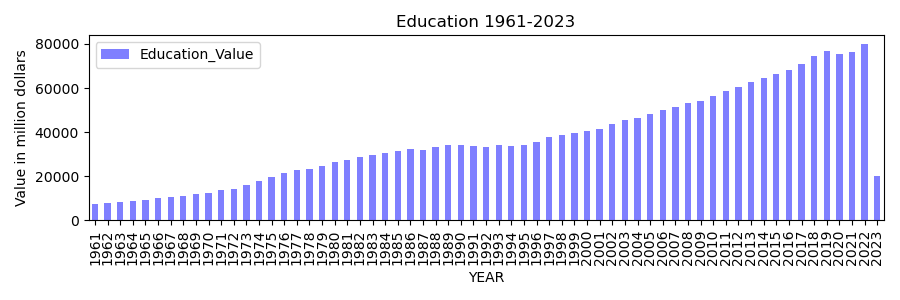

In [26]:
#Plot Education [C21]
Year_Expenses_C21.plot(kind="bar", figsize=(9,3),color="b",alpha=0.5)

# Set a title for the chart
plt.title("Education 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C21.png")
plt.show()
plt.tight_layout()


In [27]:
#Food and non-alcoholic beverages [C11]
Expenses_C11  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Food and non-alcoholic beverages [C11]", ]
Expenses_C11

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
19,1962,Food and non-alcoholic beverages [C11],324,24,158654,0.0,0.0,0.0,0
34,1963,Food and non-alcoholic beverages [C11],324,24,162303,0.0,0.0,0.0,0
49,1964,Food and non-alcoholic beverages [C11],324,24,168527,0.0,0.0,0.0,0
64,1965,Food and non-alcoholic beverages [C11],324,24,172904,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
874,2019,Food and non-alcoholic beverages [C11],324,24,417892,0.0,0.0,0.0,0
889,2020,Food and non-alcoholic beverages [C11],324,24,449754,0.0,0.0,0.0,0
904,2021,Food and non-alcoholic beverages [C11],324,24,447520,0.0,0.0,0.0,0
919,2022,Food and non-alcoholic beverages [C11],324,24,431236,0.0,0.0,0.0,0


In [28]:
Year_Expenses_C11 = Expenses_C11[["YEAR","VALUE"]]
Year_Expenses_C11=Year_Expenses_C11.set_index("YEAR")
Year_Expenses_C11= Year_Expenses_C11.rename(columns={"VALUE":"Food and non alcohol_Value"})
Year_Expenses_C11

,Food and non alcohol_Value
YEAR,
1961,152939
1962,158654
1963,162303
1964,168527
1965,172904
...,...
2019,417892
2020,449754
2021,447520


<IPython.core.display.Javascript object>


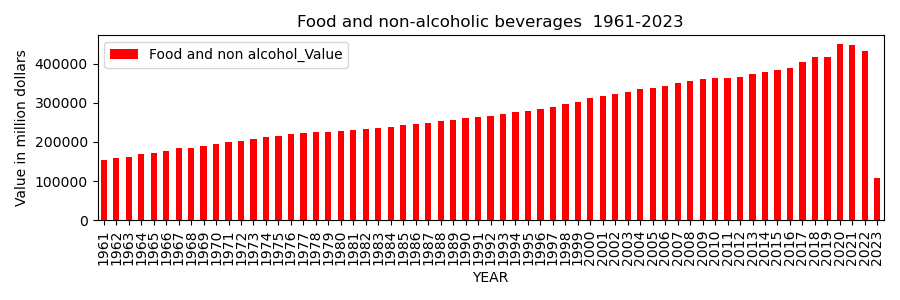

In [29]:
#Plot Food and non-alcoholic beverages [C11]

Year_Expenses_C11.plot(kind="bar", figsize=(9,3),color="r",alpha=1.0)

# Set a title for the chart
plt.title("Food and non-alcoholic beverages  1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C11.png")
plt.show()
plt.tight_layout()


In [30]:
#Food, beverage and accommodation services [C22]
Expenses_C22  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Food, beverage and accommodation services [C22]", ]
Expenses_C22

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
5,1961,"Food, beverage and accommodation services [C22]",324,24,84105,0.0,0.0,0.0,0
20,1962,"Food, beverage and accommodation services [C22]",324,24,88967,0.0,0.0,0.0,0
35,1963,"Food, beverage and accommodation services [C22]",324,24,90644,0.0,0.0,0.0,0
50,1964,"Food, beverage and accommodation services [C22]",324,24,93744,0.0,0.0,0.0,0
65,1965,"Food, beverage and accommodation services [C22]",324,24,98775,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
875,2019,"Food, beverage and accommodation services [C22]",324,24,318419,0.0,0.0,0.0,0
890,2020,"Food, beverage and accommodation services [C22]",324,24,222441,0.0,0.0,0.0,0
905,2021,"Food, beverage and accommodation services [C22]",324,24,255966,0.0,0.0,0.0,0
920,2022,"Food, beverage and accommodation services [C22]",324,24,304513,0.0,0.0,0.0,0


In [31]:
Year_Expenses_C22 = Expenses_C22[["YEAR","VALUE"]]
Year_Expenses_C22=Year_Expenses_C22.set_index("YEAR")
Year_Expenses_C22= Year_Expenses_C22.rename(columns={"VALUE":"Food and beverage_Value"})
Year_Expenses_C22

,Food and beverage_Value
YEAR,
1961,84105
1962,88967
1963,90644
1964,93744
1965,98775
...,...
2019,318419
2020,222441
2021,255966


<IPython.core.display.Javascript object>


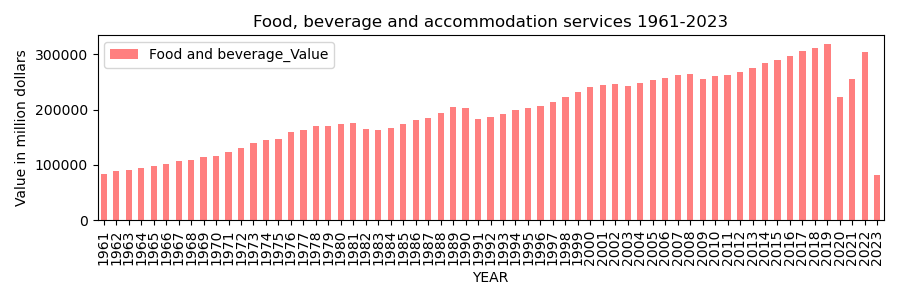

In [32]:
# Plot Food, beverage and accommodation services 1961-2023

Year_Expenses_C22.plot(kind="bar", figsize=(9,3),color="r",alpha=0.5)

# Set a title for the chart
plt.title("Food, beverage and accommodation services 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C22.png")
plt.show()
plt.tight_layout()


In [33]:
#Furnishings, household equipment and other goods and services related to the dwelling and property [C15]
Expenses_C15  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Furnishings, household equipment and other goods and services related to the dwelling and property [C15]", ]
Expenses_C15

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
6,1961,"Furnishings, household equipment and other goo...",324,24,33064,0.0,0.0,0.0,0
21,1962,"Furnishings, household equipment and other goo...",324,24,34661,0.0,0.0,0.0,0
36,1963,"Furnishings, household equipment and other goo...",324,24,35884,0.0,0.0,0.0,0
51,1964,"Furnishings, household equipment and other goo...",324,24,38087,0.0,0.0,0.0,0
66,1965,"Furnishings, household equipment and other goo...",324,24,39596,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
876,2019,"Furnishings, household equipment and other goo...",324,24,261170,0.0,0.0,0.0,0
891,2020,"Furnishings, household equipment and other goo...",324,24,272205,0.0,0.0,0.0,0
906,2021,"Furnishings, household equipment and other goo...",324,24,291442,0.0,0.0,0.0,0
921,2022,"Furnishings, household equipment and other goo...",324,24,281618,0.0,0.0,0.0,0


In [34]:
Year_Expenses_C15 = Expenses_C15[["YEAR","VALUE"]]
Year_Expenses_C15=Year_Expenses_C15.set_index("YEAR")
Year_Expenses_C15= Year_Expenses_C15.rename(columns={"VALUE":"Furnishing,household equipments_Value"})
Year_Expenses_C15

,"Furnishing,household equipments_Value"
YEAR,
1961,33064
1962,34661
1963,35884
1964,38087
1965,39596
...,...
2019,261170
2020,272205
2021,291442


<IPython.core.display.Javascript object>


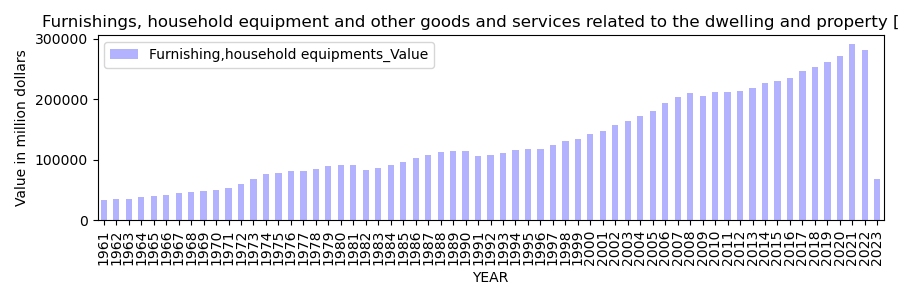

In [35]:
#Plot Furnishings, household equipment and other goods and services related to the dwelling and property [C15]

Year_Expenses_C15.plot(kind="bar", figsize=(9,3),color="b",alpha=0.3)

# Set a title for the chart
plt.title("Furnishings, household equipment and other goods and services related to the dwelling and property [C15]")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C15.png")
plt.show()
plt.tight_layout()


In [36]:
#Health [C16]
Expenses_C16  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Health [C16]", ]
Expenses_C16

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
7,1961,Health [C16],324,24,29625,0.0,0.0,0.0,0
22,1962,Health [C16],324,24,31486,0.0,0.0,0.0,0
37,1963,Health [C16],324,24,33479,0.0,0.0,0.0,0
52,1964,Health [C16],324,24,34937,0.0,0.0,0.0,0
67,1965,Health [C16],324,24,37125,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
877,2019,Health [C16],324,24,204621,0.0,0.0,0.0,0
892,2020,Health [C16],324,24,186087,0.0,0.0,0.0,0
907,2021,Health [C16],324,24,201265,0.0,0.0,0.0,0
922,2022,Health [C16],324,24,214867,0.0,0.0,0.0,0


In [37]:
Year_Expenses_C16 = Expenses_C16[["YEAR","VALUE"]]
Year_Expenses_C16=Year_Expenses_C16.set_index("YEAR")
Year_Expenses_C16= Year_Expenses_C16.rename(columns={"VALUE":"Health_Value"})
Year_Expenses_C16

,Health_Value
YEAR,
1961,29625
1962,31486
1963,33479
1964,34937
1965,37125
...,...
2019,204621
2020,186087
2021,201265


<IPython.core.display.Javascript object>


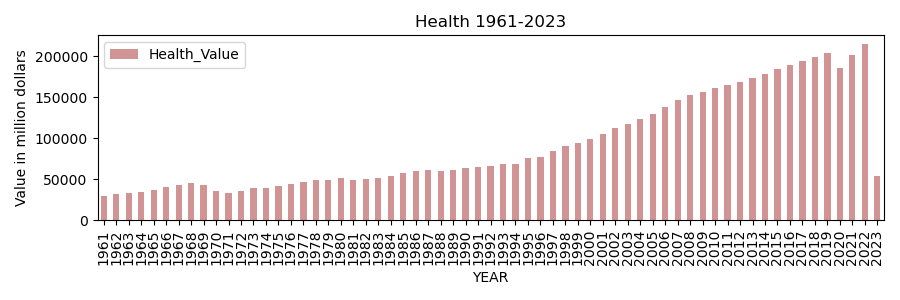

In [38]:
#Plot Health [C16]


Year_Expenses_C16.plot(kind="bar", figsize=(9,3),color="brown",alpha=0.5)

# Set a title for the chart
plt.title("Health 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C16.png")
plt.show()
plt.tight_layout()


In [39]:
#Household final consumption expenditure [C]
Expenses_C  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Household final consumption expenditure [C]", ]
Expenses_C

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
8,1961,Household final consumption expenditure [C],324,24,749193,0.0,0.0,0.0,0
23,1962,Household final consumption expenditure [C],324,24,786674,0.0,0.0,0.0,0
38,1963,Household final consumption expenditure [C],324,24,819044,0.0,0.0,0.0,0
53,1964,Household final consumption expenditure [C],324,24,863168,0.0,0.0,0.0,0
68,1965,Household final consumption expenditure [C],324,24,912926,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
878,2019,Household final consumption expenditure [C],324,24,4738960,0.0,0.0,0.0,0
893,2020,Household final consumption expenditure [C],324,24,4439946,0.0,0.0,0.0,0
908,2021,Household final consumption expenditure [C],324,24,4666014,0.0,0.0,0.0,0
923,2022,Household final consumption expenditure [C],324,24,4887941,0.0,0.0,0.0,0


In [40]:
Year_Expenses_C = Expenses_C[["YEAR","VALUE"]]
Year_Expenses_C=Year_Expenses_C.set_index("YEAR")
Year_Expenses_C= Year_Expenses_C.rename(columns={"VALUE":"Household final consumption_Value"})
Year_Expenses_C

,Household final consumption_Value
YEAR,
1961,749193
1962,786674
1963,819044
1964,863168
1965,912926
...,...
2019,4738960
2020,4439946
2021,4666014


<IPython.core.display.Javascript object>


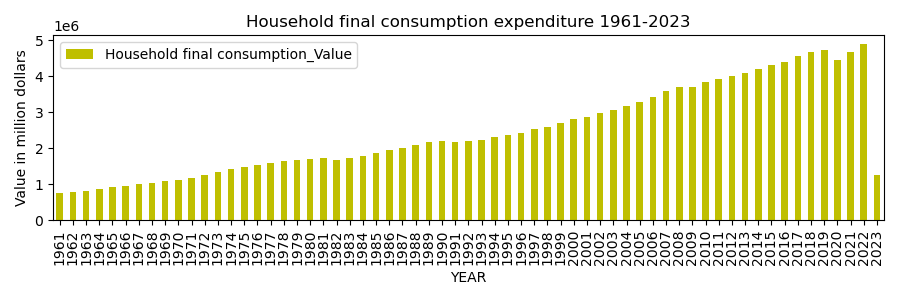

In [41]:
# Plot Household final consumption expenditure 1961-2023[C]

Year_Expenses_C.plot(kind="bar", figsize=(9,3),color="y",alpha=1.0)

# Set a title for the chart
plt.title("Household final consumption expenditure 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C.png")
plt.show()
plt.tight_layout()


In [42]:
#Housing, water, electricity, gas and other fuels [C14]
Expenses_C14  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Housing, water, electricity, gas and other fuels [C14]", ]
Expenses_C14

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
9,1961,"Housing, water, electricity, gas and other fue...",324,24,247124,0.0,0.0,0.0,0
24,1962,"Housing, water, electricity, gas and other fue...",324,24,255494,0.0,0.0,0.0,0
39,1963,"Housing, water, electricity, gas and other fue...",324,24,264508,0.0,0.0,0.0,0
54,1964,"Housing, water, electricity, gas and other fue...",324,24,274751,0.0,0.0,0.0,0
69,1965,"Housing, water, electricity, gas and other fue...",324,24,284512,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
879,2019,"Housing, water, electricity, gas and other fue...",324,24,1135754,0.0,0.0,0.0,0
894,2020,"Housing, water, electricity, gas and other fue...",324,24,1165092,0.0,0.0,0.0,0
909,2021,"Housing, water, electricity, gas and other fue...",324,24,1198077,0.0,0.0,0.0,0
924,2022,"Housing, water, electricity, gas and other fue...",324,24,1229010,0.0,0.0,0.0,0


In [43]:
Year_Expenses_C14 = Expenses_C14[["YEAR","VALUE"]]
Year_Expenses_C14=Year_Expenses_C14.set_index("YEAR")
Year_Expenses_C14= Year_Expenses_C14.rename(columns={"VALUE":"Water and Fuels_Value"})
Year_Expenses_C14

,Water and Fuels_Value
YEAR,
1961,247124
1962,255494
1963,264508
1964,274751
1965,284512
...,...
2019,1135754
2020,1165092
2021,1198077


<IPython.core.display.Javascript object>


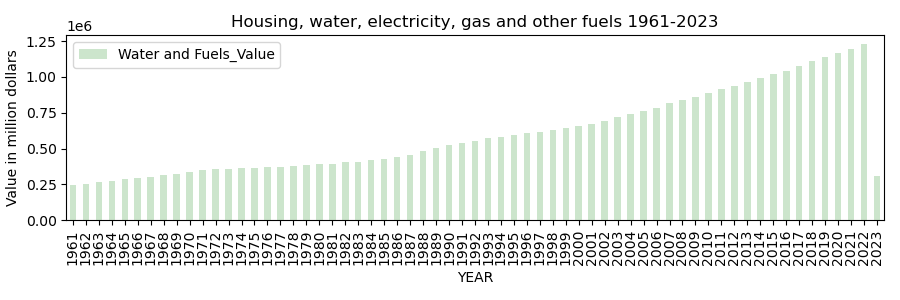

In [44]:
#Plot Housing, water, electricity, gas and other fuels [C14]

Year_Expenses_C14.plot(kind="bar", figsize=(9,3),color="g",alpha=0.2)

# Set a title for the chart
plt.title("Housing, water, electricity, gas and other fuels 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C14.png")
plt.show()
plt.tight_layout()


In [45]:
#Insurance and financial services [C23]
Expenses_C23  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Insurance and financial services [C23]", ]
Expenses_C23

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
10,1961,Insurance and financial services [C23],324,24,33956,0.0,0.0,0.0,0
25,1962,Insurance and financial services [C23],324,24,35294,0.0,0.0,0.0,0
40,1963,Insurance and financial services [C23],324,24,37504,0.0,0.0,0.0,0
55,1964,Insurance and financial services [C23],324,24,38951,0.0,0.0,0.0,0
70,1965,Insurance and financial services [C23],324,24,40992,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
880,2019,Insurance and financial services [C23],324,24,455979,0.0,0.0,0.0,0
895,2020,Insurance and financial services [C23],324,24,468283,0.0,0.0,0.0,0
910,2021,Insurance and financial services [C23],324,24,503981,0.0,0.0,0.0,0
925,2022,Insurance and financial services [C23],324,24,509040,0.0,0.0,0.0,0


In [46]:
Year_Expenses_C23 = Expenses_C23[["YEAR","VALUE"]]
Year_Expenses_C23=Year_Expenses_C23.set_index("YEAR")
Year_Expenses_C23= Year_Expenses_C23.rename(columns={"VALUE":"Insurance and financial services_Value"})
Year_Expenses_C23

,Insurance and financial services_Value
YEAR,
1961,33956
1962,35294
1963,37504
1964,38951
1965,40992
...,...
2019,455979
2020,468283
2021,503981


<IPython.core.display.Javascript object>


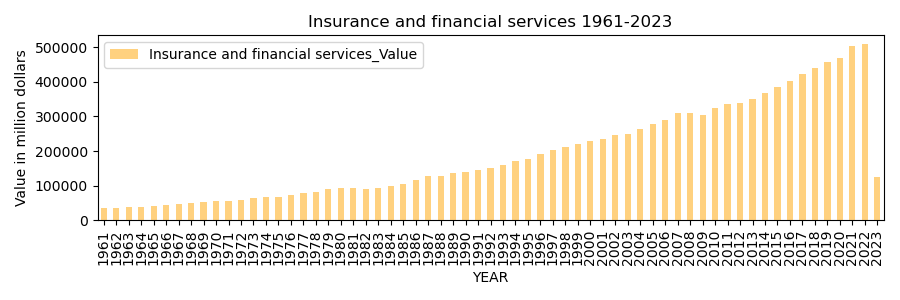

In [47]:
# Plot Insurance and financial services [C23]
Year_Expenses_C23.plot(kind="bar", figsize=(9,3),color="orange",alpha=0.5)

# Set a title for the chart
plt.title("Insurance and financial services 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C23.png")
plt.show()
plt.tight_layout()


In [48]:
#Miscellaneous goods and services [C24]
Expenses_C24  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Miscellaneous goods and services [C24]", ]
Expenses_C24

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
11,1961,Miscellaneous goods and services [C24],324,24,33266,0.0,0.0,0.0,0
26,1962,Miscellaneous goods and services [C24],324,24,35251,0.0,0.0,0.0,0
41,1963,Miscellaneous goods and services [C24],324,24,37091,0.0,0.0,0.0,0
56,1964,Miscellaneous goods and services [C24],324,24,39487,0.0,0.0,0.0,0
71,1965,Miscellaneous goods and services [C24],324,24,42256,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
881,2019,Miscellaneous goods and services [C24],324,24,245850,0.0,0.0,0.0,0
896,2020,Miscellaneous goods and services [C24],324,24,222761,0.0,0.0,0.0,0
911,2021,Miscellaneous goods and services [C24],324,24,236481,0.0,0.0,0.0,0
926,2022,Miscellaneous goods and services [C24],324,24,255727,0.0,0.0,0.0,0


In [49]:
Year_Expenses_C24 = Expenses_C24[["YEAR","VALUE"]]
Year_Expenses_C24=Year_Expenses_C24.set_index("YEAR")
Year_Expenses_C24= Year_Expenses_C24.rename(columns={"VALUE":"Miscellaneous goods and services_Value"})
Year_Expenses_C24

,Miscellaneous goods and services_Value
YEAR,
1961,33266
1962,35251
1963,37091
1964,39487
1965,42256
...,...
2019,245850
2020,222761
2021,236481


<IPython.core.display.Javascript object>


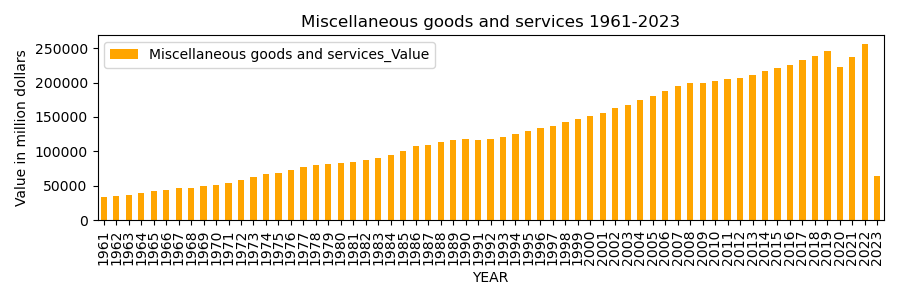

In [50]:

#PlotMiscellaneous goods and service [C24]


Year_Expenses_C24.plot(kind="bar", figsize=(9,3),color="orange",alpha=1.0)

# Set a title for the chart
plt.title("Miscellaneous goods and services 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C24.png")
plt.show()
plt.tight_layout()


In [51]:
#Net expenditure abroad [C25]
Expenses_C25  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Net expenditure abroad [C25]", ]
Expenses_C25

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
12,1961,Net expenditure abroad [C25],324,24,-4070,0.0,0.0,0.0,0
27,1962,Net expenditure abroad [C25],324,24,-9763,0.0,0.0,0.0,0
42,1963,Net expenditure abroad [C25],324,24,-12350,0.0,0.0,0.0,0
57,1964,Net expenditure abroad [C25],324,24,-11084,0.0,0.0,0.0,0
72,1965,Net expenditure abroad [C25],324,24,-11906,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
882,2019,Net expenditure abroad [C25],324,24,14260,0.0,0.0,0.0,0
897,2020,Net expenditure abroad [C25],324,24,-10996,0.0,0.0,0.0,0
912,2021,Net expenditure abroad [C25],324,24,-27792,0.0,0.0,0.0,0
927,2022,Net expenditure abroad [C25],324,24,492,0.0,0.0,0.0,0


In [52]:
Year_Expenses_C25 = Expenses_C25[["YEAR","VALUE"]]
Year_Expenses_C25=Year_Expenses_C25.set_index("YEAR")
Year_Expenses_C25= Year_Expenses_C25.rename(columns={"VALUE":"Net expenditure abroad_Value"})
Year_Expenses_C25

,Net expenditure abroad_Value
YEAR,
1961,-4070
1962,-9763
1963,-12350
1964,-11084
1965,-11906
...,...
2019,14260
2020,-10996
2021,-27792


<IPython.core.display.Javascript object>


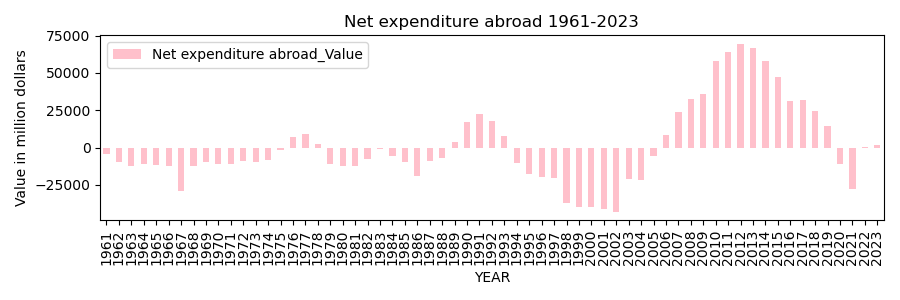

In [53]:

#Plot Net expenditure abroad [C25]


Year_Expenses_C25.plot(kind="bar", figsize=(9,3),color="pink",alpha=1.0)

# Set a title for the chart
plt.title("Net expenditure abroad 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C25.png")
plt.show()
plt.tight_layout()


In [54]:
#Recreation and culture [C19]
Expenses_C19  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Recreation and culture [C19]", ]
Expenses_C19

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
13,1961,Recreation and culture [C19],324,24,18676,0.0,0.0,0.0,0
28,1962,Recreation and culture [C19],324,24,20220,0.0,0.0,0.0,0
43,1963,Recreation and culture [C19],324,24,20959,0.0,0.0,0.0,0
58,1964,Recreation and culture [C19],324,24,22490,0.0,0.0,0.0,0
73,1965,Recreation and culture [C19],324,24,24941,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
883,2019,Recreation and culture [C19],324,24,384171,0.0,0.0,0.0,0
898,2020,Recreation and culture [C19],324,24,355971,0.0,0.0,0.0,0
913,2021,Recreation and culture [C19],324,24,384287,0.0,0.0,0.0,0
928,2022,Recreation and culture [C19],324,24,407300,0.0,0.0,0.0,0


In [55]:
Year_Expenses_C19 = Expenses_C19[["YEAR","VALUE"]]
Year_Expenses_C19=Year_Expenses_C19.set_index("YEAR")
Year_Expenses_C19= Year_Expenses_C19.rename(columns={"VALUE":"Recreation and culture_Value"})
Year_Expenses_C19

,Recreation and culture_Value
YEAR,
1961,18676
1962,20220
1963,20959
1964,22490
1965,24941
...,...
2019,384171
2020,355971
2021,384287


<IPython.core.display.Javascript object>


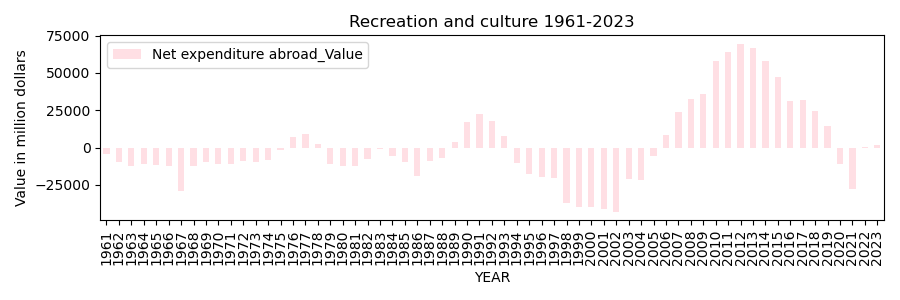

In [56]:
#Plot Recreation and culture[C19]


Year_Expenses_C25.plot(kind="bar", figsize=(9,3),color="pink",alpha=0.5)

# Set a title for the chart
plt.title("Recreation and culture 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C19.png")
plt.show()
plt.tight_layout()


In [57]:
#Transport [C17]
Expenses_C17  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Transport [C17]", ]
Expenses_C17

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
14,1961,Transport [C17],324,24,83298,0.0,0.0,0.0,0
29,1962,Transport [C17],324,24,91931,0.0,0.0,0.0,0
44,1963,Transport [C17],324,24,100714,0.0,0.0,0.0,0
59,1964,Transport [C17],324,24,111458,0.0,0.0,0.0,0
74,1965,Transport [C17],324,24,123554,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
884,2019,Transport [C17],324,24,734179,0.0,0.0,0.0,0
899,2020,Transport [C17],324,24,579575,0.0,0.0,0.0,0
914,2021,Transport [C17],324,24,614301,0.0,0.0,0.0,0
929,2022,Transport [C17],324,24,651906,0.0,0.0,0.0,0


In [58]:
Year_Expenses_C17 = Expenses_C17[["YEAR","VALUE"]]
Year_Expenses_C17=Year_Expenses_C17.set_index("YEAR")
Year_Expenses_C17= Year_Expenses_C17.rename(columns={"VALUE":"Transport_Value"})
Year_Expenses_C17

,Transport_Value
YEAR,
1961,83298
1962,91931
1963,100714
1964,111458
1965,123554
...,...
2019,734179
2020,579575
2021,614301


<IPython.core.display.Javascript object>


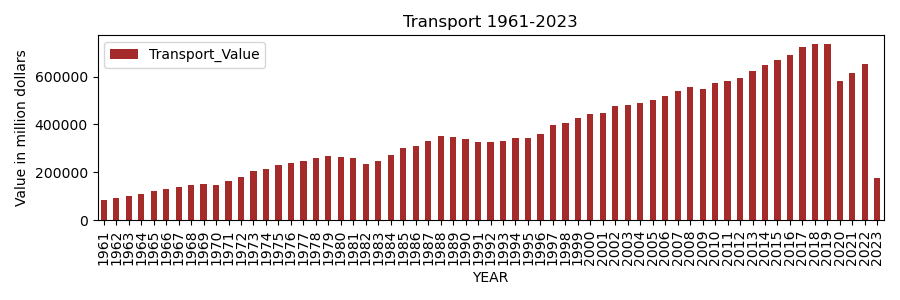

In [59]:
#Plot Transport [C17]

Year_Expenses_C17.plot(kind="bar", figsize=(9,3),color="brown",alpha=1.0)
# Set a title for the chart
plt.title("Transport 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C17.png")
plt.show()
plt.tight_layout()


In [71]:
# Merging all the data into one, to create a comaprison of all expenses
items_merge = Year_Expenses_C12.join(Year_Expenses_C13, how = "outer")
items_merge= items_merge.join(Year_Expenses_C18, on="YEAR", how = "outer")
items_merge = items_merge.join(Year_Expenses_C21, on="YEAR" ,how = "outer")
items_merge = items_merge.join(Year_Expenses_C11, on="YEAR" ,how = "outer")
items_merge = items_merge.join(Year_Expenses_C22, on="YEAR" ,how = "outer")
items_merge= items_merge.join(Year_Expenses_C15, on="YEAR" ,how = "outer")
items_merge =items_merge.join(Year_Expenses_C16, on="YEAR" ,how = "outer")
# items_merge = items_merge.join(Year_Expenses_C, on="YEAR",how = "outer")
items_merge = items_merge.join(Year_Expenses_C14, on="YEAR",how = "outer")
items_merge = items_merge.join(Year_Expenses_C23, on="YEAR",how = "outer")
items_merge = items_merge.join(Year_Expenses_C24, on="YEAR",how = "outer")
items_merge = items_merge.join(Year_Expenses_C25, on="YEAR",how = "outer")
items_merge = items_merge.join(Year_Expenses_C19, on="YEAR",how = "outer")
#items_merge = items_merge.join(Year_Expenses_C17, on="YEAR",how = "outer")
items_merge = pd.merge(items_merge,Year_Expenses_C17,on="YEAR")
items_merge.head(20)


,Alcoholic beverages_Value,Clothing and footwear_Value,Communication_Value,Education_Value,Food and non alcohol_Value,Food and beverage_Value,"Furnishing,household equipments_Value",Health_Value,Water and Fuels_Value,Insurance and financial services_Value,Miscellaneous goods and services_Value,Net expenditure abroad_Value,Recreation and culture_Value,Transport_Value
YEAR,,,,,,,,,,,,,,
1961,59899,31637,4147,7312,152939,84105,33064,29625,247124,33956,33266,-4070,18676,83298
1962,63418,33765,4418,7650,158654,88967,34661,31486,255494,35294,35251,-9763,20220,91931
1963,66918,34746,4711,8242,162303,90644,35884,33479,264508,37504,37091,-12350,20959,100714
1964,69573,35842,5057,8802,168527,93744,38087,34937,274751,38951,39487,-11084,22490,111458
1965,76114,37640,5324,9303,172904,98775,39596,37125,284512,40992,42256,-11906,24941,123554
1966,82131,39326,5834,10024,176430,101656,42515,40117,293010,42982,44584,-12230,27394,131460
1967,88177,40369,6386,10420,183444,107720,44307,42514,303213,45883,46500,-29358,30917,137377
1968,90585,41570,6793,10874,184278,109204,46419,45213,313506,49563,47295,-12556,32781,145421
1969,95946,43823,7325,11818,188601,113834,48823,43189,325734,53564,49810,-9825,36383,152384


In [61]:
# # Create a list of the years that we will use as our x axis
# years = items_merge.loc[1961:2023,]
# items_merge.plot(kind=line,x_axis=years,"Clothing and footwear_Value","Communication_Value","Education_Value","Food and non alcohol_Value",
#                  "Food and beverage_Value","Furnishing,household equipments_Value","Health_Value","Household final consumption_Value",
#                  "Water and Fuels_Value","Insurance and financial services_Value","Miscellaneous goods and services_Value","Net expenditure abroad_Value",
#                  "Recreation and culture_Value","Transport_Value")
 
# # Place a legend on the chart in what matplotlib believes to be the "best" location
# plt.legend(loc="best")

# plt.title("Household final consumption expenditure, quarterly, Canada (x 1,000,000)")
# plt.xlabel("Years")

# plt.ylabel("Value in million dollars")

# # Print our chart to the screen
# plt.show()
# plt.tight_layout()

<IPython.core.display.Javascript object>


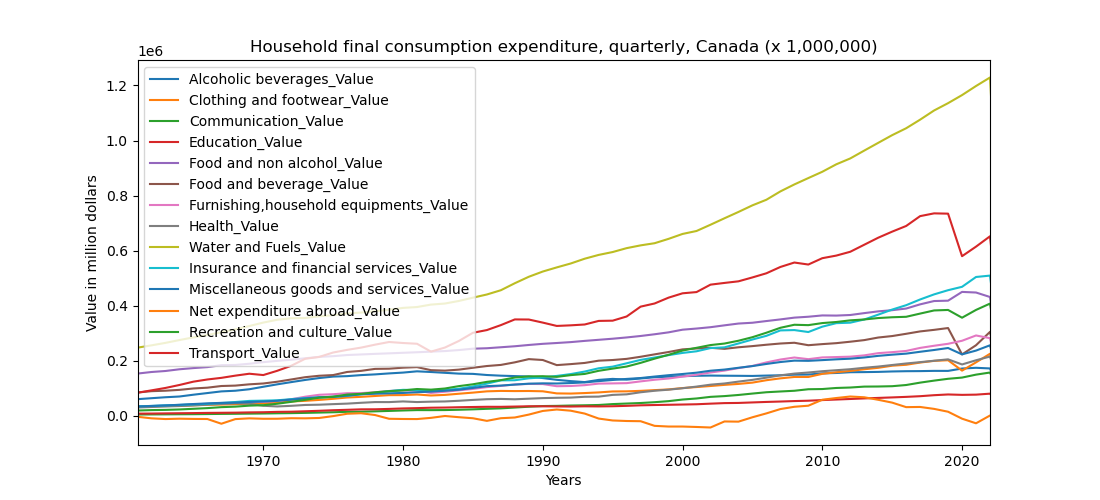

In [72]:
items_merge.plot(figsize=(11,5),xlim=(1961,2022))
plt.title("Household final consumption expenditure, quarterly, Canada (x 1,000,000)")
plt.xlabel("Years")
plt.ylabel("Value in million dollars")

# plt.ylabel("Value in million dollars")
plt.savefig("items_merge.png")


plt.show()

In [63]:
# # Create a list of the years that we will use as our x axis
# years = items_merge.loc[1961:2023,]

# # Plot 
# #plt.plot(years, Year_Expenses_C12,kind ="line", color="green", label="Alcoholic beverages_Value")

# items_merge.plot(years, Year_Expenses_C13,kind ="line", color="blue", label="Clothing and footwear_Value")

# items_merge.plot(years, Year_Expenses_C18,kind ="line", color="orange", label="Communication_Value")

# items_merge.plot(years, Year_Expenses_C21,kind ="line", color="green",alpha =0.5, label="Education_Value")

# items_merge.plot(years, Year_Expenses_C11,kind ="line", color="pink", label="Food and non alcohol_Value")

# items_merge.plot(years, Year_Expenses_C22,kind ="line", color="red", label="Food and beverage_Value")

# items_merge.plot(years, Year_Expenses_C15,kind ="line", color="red",alpha=0.5, label="Furnishing,household equipments_Value")

# items_merge.plot(years, Year_Expenses_C16,kind ="line", color="blue",alpha=0.7, label="Health_Value")

# items_merge.plot(years, Year_Expenses_C,kind ="line", color="orange",apha=0.5, label="Household final consumption_Value")

# items_merge.plot(years, Year_Expenses_C14,kind ="line", color="green",alpha=0.8, label="Water and Fuels_Value")

# items_merge.plot(years, Year_Expenses_C23,kind ="line", color="yellow", label="Insurance and financial services_Value")

# items_merge.plot(years, Year_Expenses_C24,kind ="line", color="black", label="Miscellaneous goods and services_Value")

# items_merge.plot(years, Year_Expenses_C25,kind ="line", color="yellow",alpha=0.5, label= "Net expenditure abroad_Value")

# items_merge.plot(years, Year_Expenses_C19,kind ="line", color="blue", label="Recreation and culture_Value")

# items_merge.plot(years, Year_Expenses_C17,kind ="line", color="orange",label="Transport_Value")
 
# # Place a legend on the chart in what matplotlib believes to be the "best" location
# plt.legend(loc="best")

# plt.title("Household final consumption expenditure, quarterly, Canada (x 1,000,000)")
# plt.xlabel("Years")

# plt.ylabel("Value in million dollars")

# # Print our chart to the screen
# plt.show()
# plt.tight_layout()


In [64]:
# years = items_merge.loc[1961:2021,]
# Year_Expenses_C12.plot(kind="line", figsize=(9,3),label="Alcoholic beverages_Value")
# Year_Expenses_C17.plot(kind="line", figsize=(9,3),color="brown",alpha=0.5,label="Transport_Value")

# plt.title("Household final consumption expenditure, quarterly, Canada (x 1,000,000)")
# plt.xlabel("Years")

# plt.ylabel("Value in million dollars")

# # Print our chart to the screen
# plt.show()
# plt.tight_layout()
